# Instacart Customer Data Ordering Trends
 
 There are five data sets that are being used to determine some trends by the Instacart customer. 
- instacart_orders_df - contains data on the customers' ordering habits. Specifically about day and time of ordering and days between ordering
- products_df - contains product information and where it is located in stores
- aisles_df - contains information on aisles and which products can be found in which aisles
- departments_df - contains information about the different grocery store departments and what general items they should contain.
- order_prod_df - contains information about products and tracks data on reordering of products and the order they were placed into the cart.

## Project Brief:
For this project, the data will be cleaned and then customer data will be added to histograms to find the distrubution of data such as time of day of orders, most ordered products, and reordered products. In addition, the data analysis will look into amount of items a typical customer will order and the proportion of items that a customer reorders. This analysis will give an insight into Instacart customers and allow the stores and instacart to stock the correct items and improve customer satisfaction.


Importing all of the libraries necessary to do this project:
- Pandas - for data manipulation and analysis 
- Numpy - for scientific computing
- Plotly.express - for creating interactive and publication-quality visualizations
- matplotlib - for creating visualizations such as plots
- IPython.display - is an interactive command-line terminal for Python, it is used in this project to display data frames


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import display

In [ ]:
# importing all the data files into the notebook
instacart_orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep = ';') 
products_df = pd.read_csv('/datasets/products.csv', sep = ';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep = ';')
departments_df = pd.read_csv('/datasets/departments.csv', sep = ';')
order_prod_df = pd.read_csv('/datasets/order_products.csv', sep = ';')

## Baseline Data Visual for each Data Set


In [3]:
instacart_orders_df.info()
instacart_orders_df.sample(5, random_state=13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
60648,640171,135172,5,1,12,15.0
41598,2724933,858,17,2,13,0.0
172408,2396497,151247,17,5,12,7.0
303945,3038618,100875,35,1,19,6.0
308232,199073,60508,9,4,12,7.0


In [4]:
products_df.info()
products_df.sample(5, random_state=13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
1908,1909,Gluten Free Pasta Penne Rigate,131,9
19456,19457,Organic One Ingredient Peanut Butter,88,13
4149,4150,Premium Genoa,96,20
28378,28379,Protein Chewy Bars Salted Caramel Nut,48,14
40617,40618,First Aid Antibiotic Ointment,118,11


In [5]:
aisles_df.info()
aisles_df.sample(5, random_state=13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
121,122,meat counter
111,112,bread
106,107,chips pretzels
90,91,soy lactosefree
69,70,digestion


In [6]:
departments_df.info()
departments_df.sample(5, random_state=13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
11,12,meat seafood
13,14,breakfast
0,1,frozen
1,2,other
8,9,dry goods pasta


In [ ]:
#order_prod_df.info() 
# This has many rows. When a DataFrame has too many rows, info() will not print the non-null counts by default. 

order_prod_df.info(show_counts =True)
order_prod_df.sample(5, random_state=13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
1444665,1754737,24535,5.0,1
3244783,3168802,17794,9.0,0
2238925,677670,46802,12.0,1
1463649,2274841,41220,1.0,1
230747,2303444,39108,7.0,1


**Intial take away:**
   1. instacart_orders_df:
        - 'order_dow'column is day of the week that the order placed 
        - days_since_prior_order column has **450148/478967 non-null values**
        - days_since_prior_order column is float, because of the non-null values
   2. products_df:
        - product_name column has **48436/49694 non-null values**
        - product_name column **check for unique**
   3. aisles_df:
        - aisle column **check for unique**
   4. departments_df:
        - department column has 'other' and 'missing' category. **check for unique**
   5. order_prod_df:
        - add_to_cart_order column has **4544171/4545007 non-null**
        - add_to_cart_order is float, because of the non-null values

In [8]:
#products_df['product_name'].unique()   # some values all uppercase, some lower case

#aisles_df['aisle'].unique()            # contains 'missing' value in some

#departments_df['department'].unique()  # contains 'other' and 'missing'

## Find and remove duplicate values

### `orders` data frame

In [ ]:
# Check for duplicated orders
instacart_orders_df.fillna('').value_counts() 
# since the length is different than the row count before we have duplicates

duplicates_insta = instacart_orders_df.duplicated().sum()
display(duplicates_insta)

15

In [ ]:
# Looking at the specific duplicated rows to see if any pattern

instacart_orders_df[instacart_orders_df.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [ ]:
# assuming sunday is 0 

# Mapping integers to weekday names
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

# Assuming 'order_dow' contains integer values representing the day of the week
instacart_orders_df['day'] = instacart_orders_df['order_dow'].map(day_mapping)

# Check for all orders placed Wednesday at 2:00 AM
wed_2am_orders = instacart_orders_df[(instacart_orders_df['day']=='Wednesday') & (instacart_orders_df['order_hour_of_day']==2)]
display(wed_2am_orders)
wed_2am_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day
4838,2766110,162084,41,3,2,16.0,Wednesday
5156,2190225,138285,18,3,2,11.0,Wednesday
15506,553049,58599,13,3,2,7.0,Wednesday
18420,382357,120200,19,3,2,11.0,Wednesday
24691,690242,77357,2,3,2,9.0,Wednesday
...,...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0,Wednesday
458816,910166,164782,18,3,2,4.0,Wednesday
459635,1680532,106435,6,3,2,21.0,Wednesday
468324,222962,54979,59,3,2,3.0,Wednesday


<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
 6   day                     121 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
# Remove duplicate orders
instacart_orders_df = instacart_orders_df.drop_duplicates()

In [13]:
# Double check for duplicate rows
print(instacart_orders_df.duplicated().sum())

0


In [14]:
# Double check for duplicate order IDs only
print(instacart_orders_df['order_id'].duplicated().sum())

0


## Take Aways:
- There were duplicates in the data specifically on Wednesdays at at 2:00am
- These duplicates were dropped from the data frame

### `products` data frame

In [ ]:
# Check for fully duplicate rows
products_df.duplicated().sum()

0

In [16]:
# Check for just duplicate product IDs
dup_prod_id = products_df['product_id'].duplicated().sum() #  0 duplicates

print(dup_prod_id)

0


In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['pod_name_lowercase']=products_df['product_name'].str.lower()


dup_prod_name = products_df['pod_name_lowercase'].duplicated().sum() 

print(dup_prod_name)

1361


In [18]:
# Check for duplicate product names that aren't missing

#    Corrections:


duplicates_not_missing = products_df[products_df['pod_name_lowercase'].duplicated(keep=False) & products_df['pod_name_lowercase'].notna()]
display(duplicates_not_missing)
display(duplicates_not_missing[duplicates_not_missing['pod_name_lowercase']=='biotin 1000 mcg'])

#Dropping duplicates that aren't 'unknown' and dropping all unkown data

products_unknown = products_df[products_df['pod_name_lowercase']=='unkown']
#display(products_unknown)
#products_unknown['department_id'].unique() # only department 21 has unknowns

#dropping duplicates
products_df.drop_duplicates(subset='pod_name_lowercase', keep='first')# keeping first
products_df[~(products_df['pod_name_lowercase'] == 'unkown')] # only keeping rows without unkown in pod name column


,product_id,product_name,aisle_id,department_id,pod_name_lowercase
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,fresh scent dishwasher detergent with dawn
515,516,American Cheese Slices,21,16,american cheese slices
1538,1539,Cauliflower head,83,4,cauliflower head
1783,1784,NUTrition Protein Mix Blueberry Nut,117,19,nutrition protein mix blueberry nut
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


,product_id,product_name,aisle_id,department_id,pod_name_lowercase
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
2058,2059,Biotin 1000 Mcg,47,11,biotin 1000 mcg


,product_id,product_name,aisle_id,department_id,pod_name_lowercase
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


# Take Aways:
- the duplicated products were taken out and the unknown products were taken out of the data frame. Both of these didn't add any information, but its important to keep in mind that all unknown products were from department 21 and unknown was spelled wrong.

### `departments` data frame

In [19]:
print(departments_df)

print('-----')

duplicates_dep = departments_df.duplicated().sum() 
print(duplicates_dep)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
-----
0


In [20]:
duplicates_dep_id = departments_df['department_id'].duplicated().sum() 
print(duplicates_dep_id)

0


# Take Aways:
- There were no full row duplicates, nor duplicated department ids

### `aisles` data frame

In [21]:
duplicates_aisle = aisles_df.duplicated().sum()
print(duplicates_aisle)

duplicates_aisle_id = aisles_df['aisle_id'].duplicated().sum()
print(duplicates_aisle_id)

duplicates_aisle_col = aisles_df['aisle'].duplicated().sum()
print(duplicates_aisle_col)

0
0
0


# Take Aways:
- No complete duplicate rows, nor duplicated ids and aisles in the aisle data.

### `order_products` data frame

In [ ]:
# Check for fullly duplicate rows
order_prods_dups = order_prod_df.duplicated().sum()
print(order_prods_dups)

#no complete duplicated rows
order_prod_df.info(show_counts =True)
print(order_prod_df.head())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [ ]:
# Double check for other tricky duplicates
print(order_prod_df['reordered'].unique())  # data only contains 0s and 1s

#see where the nan values show up in the ordered list per order
order_prod_nan = order_prod_df[order_prod_df['add_to_cart_order'].isna()]
print(order_prod_nan)

# trying out some order ids to see where the nan values are: 2449164, 1968313, 2926893, 1717990,1959075 

order_2449164 = order_prod_df[order_prod_df['order_id']==2449164].sort_values(by = 'add_to_cart_order')
#order_1968313 = order_prod_df[order_prod_df['order_id']==1968313].sort_values(by = 'add_to_cart_order')
#order_2926893 = order_prod_df[order_prod_df['order_id']==2926893].sort_values(by = 'add_to_cart_order')
#order_1717990 = order_prod_df[order_prod_df['order_id']==1717990].sort_values(by = 'add_to_cart_order')
#order_1959075 = order_prod_df[order_prod_df['order_id']==1959075].sort_values(by = 'add_to_cart_order')

print(order_2449164)
#print(order_1968313)
#print(order_2926893)
#print(order_1717990)
#print(order_1959075)

# based on these 5 the Nan values are towards the end of the order placed in cart. 
#I'll leave them in for now and change later if I need to look inot later add to cart order


# order_id + product_id duplication

dup_ord_prod = order_prod_df[order_prod_df.duplicated(['order_id', 'product_id'],keep=False)]
display(dup_ord_prod)


order_prod_df['add_to_cart_order'].unique()

[0 1]
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]
         order_id  product_id  add_to_cart_order  reordered
925415    2449164        5212                1.0          1
3040088   2449164       24852                2.0          1
1866557   2449164       20995                3.0          1
3278416   

,order_id,product_id,add_to_cart_order,reordered


array([17.,  1., 35.,  5.,  4., 10., 14.,  2., 28.,  3., 16.,  8.,  7.,
        6.,  9., 15., 22., 49., 19., 13., 11., 12., 18., 24., 23., 45.,
       30., 31., 29., 21., 38., 20., 57., 58., 26., 25., 39., 34., 40.,
       27., nan, 43., 33., 42., 50., 32., 36., 37., 61., 46., 56., 41.,
       44., 55., 54., 47., 63., 48., 60., 62., 53., 59., 52., 51., 64.])

In [ ]:
# looking for duplicated rows that order_id and product_id are duplicated
order_prod_df.duplicated(subset=['order_id', 'product_id']).sum()

0

# Take Aways:
- There are no duplicated order ID and product ID

## Find and remove missing values


### `products` data frame

In [ ]:
#checking for total number of duplicates
products_df[products_df.duplicated()]


,product_id,product_name,aisle_id,department_id,pod_name_lowercase


In [26]:
# Are all of the missing product names associated with aisle ID 100?
#products_df.info()
#missing_names = 49694 -48436 # 1258 missing product names

missing_in_100= products_df[products_df['aisle_id']== 100].isna().sum()
print(missing_in_100) 

#1258 missing product names in aisle 100, so yes only aisle 100 has the missing product names


product_id               0
product_name          1258
aisle_id                 0
department_id            0
pod_name_lowercase    1258
dtype: int64


In [27]:
# Are all of the missing product names associated with department ID 21?
missing_id_21 = products_df[products_df['department_id']== 21].isna().sum()
print(missing_id_21) 

# 1258 nan values matched to department_id 21. yes all missing products associated with id 21

product_id               0
product_name          1258
aisle_id                 0
department_id            0
pod_name_lowercase    1258
dtype: int64


In [28]:
# What is this ailse and department?
missing_names = products_df[(products_df['department_id'] == 21) & (products_df['aisle_id'] == 100)]
print(missing_names.head())

departments_df[departments_df['department_id']==21] # missing from departments_df data

aisles_df[aisles_df['aisle_id']==100] # missing from aisles_df data

# unable to find aisle and department based on the data avaliable

     product_id product_name  aisle_id  department_id pod_name_lowercase
37           38          NaN       100             21                NaN
71           72          NaN       100             21                NaN
109         110          NaN       100             21                NaN
296         297          NaN       100             21                NaN
416         417          NaN       100             21                NaN


,aisle_id,aisle
99,100,missing


In [ ]:
display(departments_df[departments_df['department_id']==21]) # missing from departments_df data

aisles_df[aisles_df['aisle_id']==100]

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


In [30]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna(value='Unkown')
products_df['pod_name_lowercase'] = products_df['pod_name_lowercase'].fillna(value='unkown')

display(products_df[(products_df['department_id'] == 21) & (products_df['aisle_id'] == 100)])

,product_id,product_name,aisle_id,department_id,pod_name_lowercase
37,38,Unkown,100,21,unkown
71,72,Unkown,100,21,unkown
109,110,Unkown,100,21,unkown
296,297,Unkown,100,21,unkown
416,417,Unkown,100,21,unkown
...,...,...,...,...,...
49552,49553,Unkown,100,21,unkown
49574,49575,Unkown,100,21,unkown
49640,49641,Unkown,100,21,unkown
49663,49664,Unkown,100,21,unkown


# Take Aways:
- There was no total duplication of the data in the data frame.
- All of the 'unkown' values fall within aisle 100 and department 21. Totaling 1258 'unkown' values

### `orders` data frame

In [31]:
instacart_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
 6   day                     478952 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 29.2+ MB


In [32]:
# Are there any missing values where it's not a customer's first order?
instacart_orders_df[(instacart_orders_df['order_number'] != 1) & (instacart_orders_df['days_since_prior_order'].isna())]

#the empty data frame indicates that there are no instances where 
#days_since_prior_order is missing for orders beyond the first order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day


The empty data frame indicates that there are no instances where days_since_prior_order is missing for orders beyond the first order.

### `order_products` data frame

In [33]:
order_prod_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
# What are the min and max values in this column?
print(order_prod_df['add_to_cart_order'].min())
print(order_prod_df['add_to_cart_order'].max())

1.0
64.0


In [35]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values_to_cart_opdf = order_prod_df[order_prod_df['add_to_cart_order'].isna()]['order_id'].unique()
missing_values_to_cart_opdf
  # series with unique order ids with missing values in 'add_to_cart_order'

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

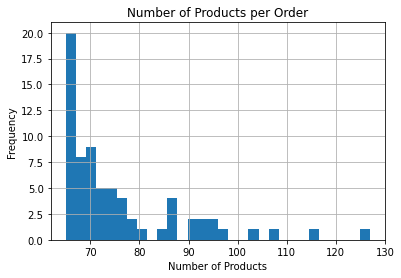

In [36]:
# Do all orders with missing values have more than 64 products?
orders_with_missing_values = order_prod_df[order_prod_df['order_id'].isin(missing_values_to_cart_opdf)]

# Group by order_id and count the number of products in each order
products_per_order = orders_with_missing_values.groupby('order_id').size()
products_per_order 

# Check if any order has more than 64 products
products_per_order.plot(kind='hist', bins=30, title = 'Number of Products per Order',ylabel = 'Frequency', grid=True,)
plt.xlabel('Number of Products')
plt.show()


In [37]:
#Added by reviewer

products_per_order.min()

65

# Take Aways:
- All the orders with missing values contain over 64 products
- the maximum add-to-cart_order in the dataframe that is not missing is 64
- there is a problem with assigning an add-to-cart-order for the products added to the cart after 64th

In [38]:
# Replace missing values with 999 and convert column to integer type

order_prod_df['add_to_cart_order'] = order_prod_df['add_to_cart_order'].fillna(value=999).astype('int')


order_prod_df.info(show_counts =True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


# Take Aways:
- The missing 836 values were filled in with 999, and the column changed from float to integer values.

# Basic EDA

### Verifying that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible

In [39]:
sorted(instacart_orders_df['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [40]:
instacart_orders_df['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

Both 'order_hour_of_day' and 'order_dow'values are reasonable.
(i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6)

### Time of Day of Shoppers

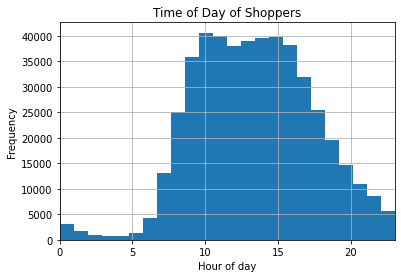

In [41]:
instacart_orders_df['order_hour_of_day'].plot(kind='hist', bins=24, title = 'Time of Day of Shoppers',ylabel = 'Frequency', grid=True, xlim=(0, 23))
plt.xlabel('Hour of day')
plt.show()


## Take Away:
- Typically ordering starts at 6 am and begins to pickup and peaks before and after the lunch hour before dropping off as the night goes on reaching similar frequency at midnight as the 6 am hour. There is a small amount of ordering done from midnight to 6 am.
- peaks from 10 am to 3 pm

### Day of the week of Shoppers

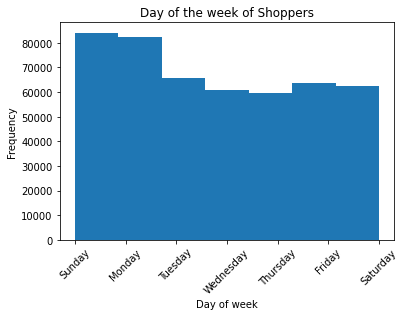

In [42]:
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

instacart_orders_df['order_dow'].plot(kind='hist', bins=7, title = 'Day of the week of Shoppers',ylabel = 'Frequency', rot=45)
plt.xlabel('Day of week')
plt.xticks(range(7), day_labels)
plt.show()


## Take Away:
- The data is showing that most ordering is done on Sunday and Monday and the rest of the days are less but all along the same frequency.

### Ordering Delay Time

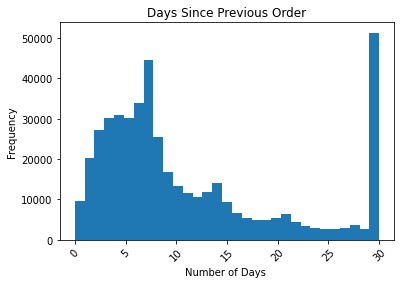

0.0
30.0


In [ ]:
#plot that shows how long people wait until placing their next order

instacart_orders_df['days_since_prior_order'].plot(kind='hist', bins=31, title = 'Days Since Previous Order',ylabel = 'Frequency', rot=45)
plt.xlabel('Number of Days ')

plt.show()
print(instacart_orders_df['days_since_prior_order'].min())
print(instacart_orders_df['days_since_prior_order'].max())

## Take Away:
- The minimum value is 0 days since previous order and the maximum tracked days since previouc order is 30. There are a lot of Nan values which will be data that didn't have a previous order or data that is more than 30 days since a previous order and Instacart will treat these customers as a new customer.

### Ordering distributions on Weekday (Wednesdays) vs Weekend (Saturdays)

In [44]:

Wed_df = instacart_orders_df[instacart_orders_df['order_dow']==3]
Sat_df = instacart_orders_df[instacart_orders_df['order_dow']==6]

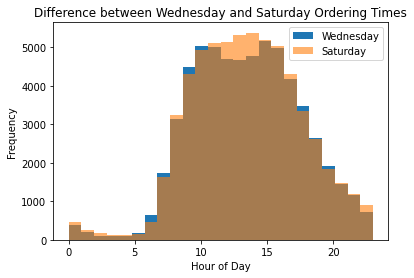

In [45]:
Wed_df['order_hour_of_day'].plot(kind='hist', bins=24, title = 'Difference between Wednesday and Saturday Ordering Times',
                                                                    ylabel = 'Frequency', rot=45)
Sat_df['order_hour_of_day'].plot(kind='hist', bins=24, title = 'Difference between Wednesday and Saturday Ordering Times',
                                                                   alpha=0.6)
plt.xlabel('Hour of Day')
plt.legend(['Wednesday', 'Saturday'])

plt.show()

## Take Away:
- The main difference is there is a dip in ordering on Wednesdays during the lunch hour. Where as on a weekend there is no set working lunch hour, and the chart has a single peak instead of the double peak around the lunch hour like Wednesday has.

### Orders per Customer Distribution

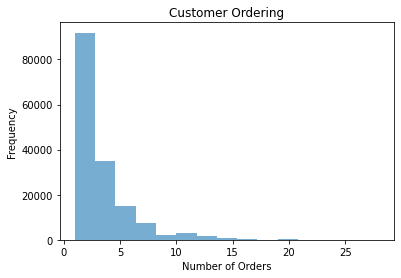

In [47]:
order_per_cust = instacart_orders_df.groupby('user_id')['order_id'].count()

order_per_cust.plot(kind='hist', bins=15, title = 'Customer Ordering',alpha=0.6)
plt.xlabel('Number of Orders')

plt.show()

## Take Away:
- Based on the histogram, most customers have ordered less than 5 times.

### Top 20 popular products

In [48]:
# Assuming 'products_merged' is your DataFrame after merging 'products' with 'order_products'
# Make sure 'products_merged' includes 'product_id', 'product_name' at least 

products_merged = products_df.merge(order_prod_df, on = 'product_id')

# Group by both 'product_id' and 'product_name', then count the number of rows in each group
product_counts = products_merged.groupby(['product_id', 'product_name']).size().reset_index(name='count')

# Sort the products by count in descending order
product_counts_sorted = product_counts.sort_values('count', ascending=False)

# Take the top 20 products
top_20_products = product_counts_sorted.head(20)

# The top 20 products with their IDs and names
display(top_20_products)


,product_id,product_name,count
22808,24852,Banana,66050
12025,13176,Bag of Organic Bananas,53297
19370,21137,Organic Strawberries,37039
20077,21903,Organic Baby Spinach,33971
43271,47209,Organic Hass Avocado,29773
43788,47766,Organic Avocado,24689
43663,47626,Large Lemon,21495
15364,16797,Strawberries,20018
24047,26209,Limes,19690
25556,27845,Organic Whole Milk,19600


## Take Away:
- The peak is 66,000 and the low end of the top 20 is 11,000.

### Distribution and Quantity of Items per Order

The average number of items per order is: 10.098983215049127


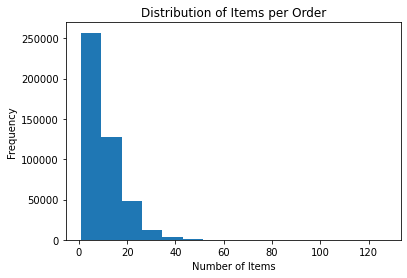

In [49]:

# Group data by 'order_id' and count the number of products per order
items_per_order = order_prod_df.groupby('order_id')['product_id'].count()
# Calculating the average items per order
average_items = items_per_order.mean()
print("The average number of items per order is:", average_items)
# Plot the distribution of the number of items per order
items_per_order.plot(kind="hist", bins=15, title='Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel("Frequency")
plt.show()

## Take Away:
- The data shows that most customers are ordering less than 20 items per order. Instacart is being used mainly for the last minute items/ small orders instead of the main grocery shopping for its customers.

### Top 20 Frequently Reordered Items

In [50]:
# Find the sum of reorders for each product
reordered_df = order_prod_df.groupby('product_id')['reordered'].sum()
total_ordered_df = order_prod_df.groupby('product_id')["order_id"].count()

In [51]:
# Create a DataFrame with the count of total orders for each product
proportion_reorders_df = reordered_df / total_ordered_df

In [52]:
# Calculate the reorder proportion for each product
proportion_reorders_df = proportion_reorders_df.sort_values(ascending=False)
print(proportion_reorders_df.head())

product_id
14721    1.0
20949    1.0
6723     1.0
6732     1.0
45088    1.0
dtype: float64


In [53]:
# Combine the data into a single DataFrame
product_reorder_freq = pd.DataFrame({
    'Total orders': total_ordered_df,
    'Reorders': reordered_df,
    'Reorder proportion': proportion_reorders_df
}).reset_index()

# Merge with the products DataFrame to get product names
product_reorder_freq = product_reorder_freq.merge(products_df, on='product_id', how='inner')

# Sort by the number of reorders in descending order
top_reordered = product_reorder_freq.sort_values(by='Reorders', ascending=False)

# Select the top 20 items by the number of reorders
top_20_reordered = top_reordered.head(20)

# Display the top 20 items
display(top_20_reordered[['product_id', 'product_name', 'Reorders']])

,product_id,product_name,Reorders
22808,24852,Banana,55763
12025,13176,Bag of Organic Bananas,44450
19370,21137,Organic Strawberries,28639
20077,21903,Organic Baby Spinach,26233
43271,47209,Organic Hass Avocado,23629
43788,47766,Organic Avocado,18743
25556,27845,Organic Whole Milk,16251
43663,47626,Large Lemon,15044
25666,27966,Organic Raspberries,14748
15364,16797,Strawberries,13945


## Take Aways:
- This is very similar to the top 20 items list
- Bananas at the top with 55,000 reorders and organic half & half at the bottom of the top 20 with 8,000 reorders.

# Project Conclusion:
For this project, the data was cleaned and duplicated and missing data was taken out of the data set. The porpostion of the data was small compared to the total amount of data avaliable. The data distribution showed that most ordering is done on Sundays and Mondays and above the top 20 product ordered and the top 20 products reordered was found. The data also displayed that typically Instacart customers are using this service to get last minute groceries and this result In addition, the data analysis will look into amount of items a typical customer will order and the proportion of items that a customer reorders. This analysis will give an insight into Instacart customers and allow the stores and instacart to stock the correct items and improve customer satisfaction.